<a href="https://colab.research.google.com/github/ask350/Deep-Learning/blob/main/Unstructured_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis for text

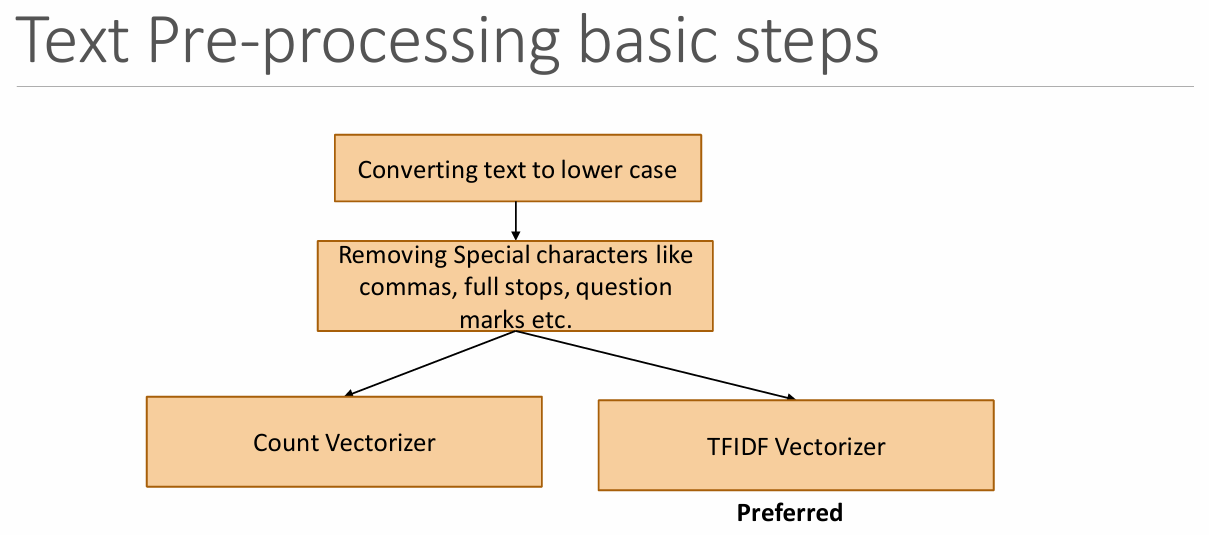

In [1]:
st = "I liked the Place.....!"

In [2]:
s2 = st.lower()

In [3]:
s2

'i liked the place.....!'

In [4]:
import re           # Regular Expression

In [5]:
re.sub("[^a-z ]", "", s2)

'i liked the place'

In [6]:
def clean_text(text):
  text = text.lower()
  text = re.sub("[^a-z ]", "", text)
  return text

In [7]:
clean_text("I did not liked the taste,of sandwich....!")

'i did not liked the tasteof sandwich'

### Step 1 - Data Ingestion

In [8]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"

In [9]:
print("Sentence1\tSentence2")

Sentence1	Sentence2


In [10]:
import pandas as pd
df = pd.read_csv(url, sep="\t")                    # \t for tsv data set
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Step 2 - Clean the review data

In [11]:
df["pre"] = df["Review"].apply(clean_text)

In [12]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


### Step 3 - Seperate X and Y(Liked)

In [13]:
X = df["pre"]
Y = df["Liked"]

In [14]:
X

,pre
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone
997,overall i was not impressed and would not go back
998,the whole experience was underwhelming and i t...


In [15]:
Y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [16]:
Y.value_counts()

,count
Liked,
1,500
0,500


### Step 4 - Apply TFIDF on Text Data (no pipeline for unstructured data)


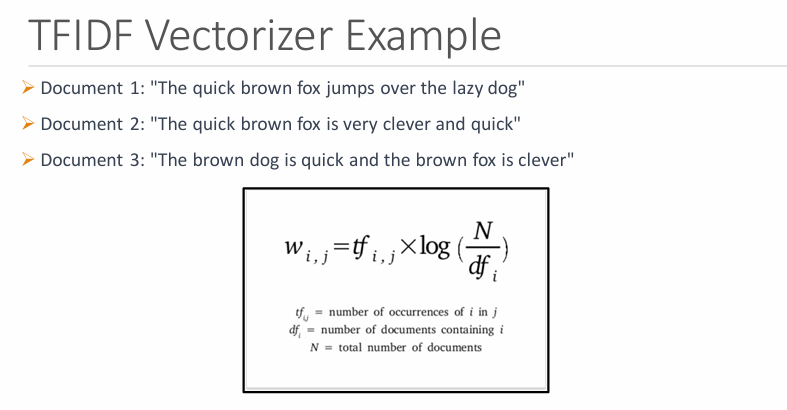

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf = TfidfVectorizer()

X_pre = tfidf.fit_transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
X_pre.shape

(1000, 2046)

##### 1000 columns, 2046 unique words in data


### Apply train test split on X_pre

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [21]:
xtrain.shape

(800, 2046)

In [22]:
xtrain.shape[1]          # number of neurons = no. of columns

2046

In [23]:
xtest.shape

(200, 2046)

### Build a neural network

In [24]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

In [25]:
# Initialize the model
model = Sequential()

# Add a input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Hidden layer 1
model.add(Dense(units =64, activation='relu'))

# Add dropout layer
model.add(Dropout(0.3))

# Add Hidden layer 2
model.add(Dense(units =32, activation='relu'))

# Add Dropout layer
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units =1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         131,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,121 (520.00 KB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
es = EarlyStopping(monitor = "val_loss", patience=15)

In [29]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=200, callbacks=[es])

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.5054 - loss: 0.6925 - val_accuracy: 0.4375 - val_loss: 0.6937
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5544 - loss: 0.6853 - val_accuracy: 0.4625 - val_loss: 0.6902
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6282 - loss: 0.6655 - val_accuracy: 0.5500 - val_loss: 0.6725
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.6056 - val_accuracy: 0.7750 - val_loss: 0.6128
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.4636 - val_accuracy: 0.8250 - val_loss: 0.5130
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.2987 - val_accuracy: 0.8000 - val_loss: 0.4536
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.1790 - val_accuracy: 0.8500 - val_loss: 0.3850
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9821 - loss: 0.1041 - val_accuracy: 0.8500 -

### Evaluate the model

In [30]:
model.evaluate(xtrain, ytrain)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9983 - loss: 0.0060


[0.04642527922987938, 0.9850000143051147]

In [31]:
model.evaluate(xtest, ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7879 - loss: 0.7510


[0.7106931805610657, 0.7900000214576721]

### Predict the results on test data

In [32]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.11511228],
       [0.9989249 ],
       [0.999703  ],
       [0.9983944 ],
       [0.98592573]], dtype=float32)

In [33]:
def predict_sentiment(model, x):
  yprob = model.predict(x)
  ypred = [1 if prob>=0.5 else 0 for prob in yprob]
  return ypred

In [34]:
ypred_test = predict_sentiment(model, xtest)
ypred_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


[0, 1, 1, 1, 1]

In [35]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


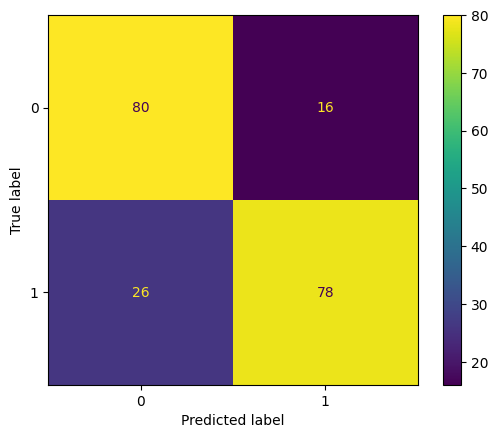

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        96
           1       0.83      0.75      0.79       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



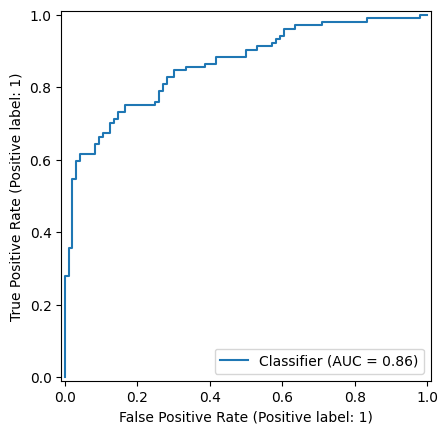

In [38]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(ytest, yprob_test)

### Out of sample prediction

In [46]:
def out_of_sample_pred(text):
  text = clean_text(text)
  text_pre = tfidf.transform([text]).toarray()
  prob = model.predict(text_pre)
  if prob >= 0.5:
    return "Positive", prob.round(4)[0][0]
  else:
    return "Negative", prob.round(4)[0][0]

In [47]:
text1 = "Very good place, i liked the ambience!..."
out_of_sample_pred(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


('Positive', 0.9918)

In [48]:
text2 = "bad place, service was SLOW"
out_of_sample_pred(text2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


('Negative', 0.0)

In [49]:
text3 = "The taste was average overall it was an ok experience"
out_of_sample_pred(text3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


('Negative', 0.0006)

In [51]:
text4 = "The service was very good, i was quite impressed by food"
out_of_sample_pred(text4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


('Positive', 0.6286)

### Save the model

In [52]:
model.save("sentiment_model.keras")

### load the model

In [53]:
from keras.models import load_model

In [54]:
m = load_model("/content/sentiment_model.keras")

In [55]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         131,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 399,365 (1.52 MB)

 Trainable params: 133,121 (520.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 266,244 (1.02 MB)